## **Finance Project**
Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. Here I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic Regresssion, K-Nearest Neighbors(KNN) and Naive Bayes Algorigthm.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

In [20]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Rearranging Target Column.

In [21]:
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = personal_loan
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [22]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [23]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [25]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [27]:
df.isnull().values.any()

False

No missing values.

<Axes: >

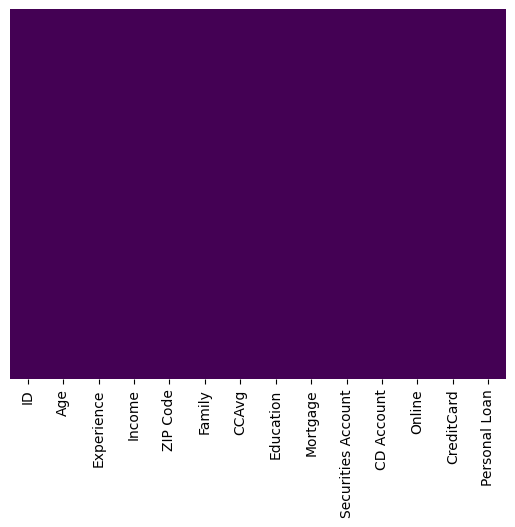

In [28]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

Missing value visualisation verifies no missing values as claimed above.

In [29]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


Need to fix Experience column as negative value appears for min.

In [32]:
df_transpose = df.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


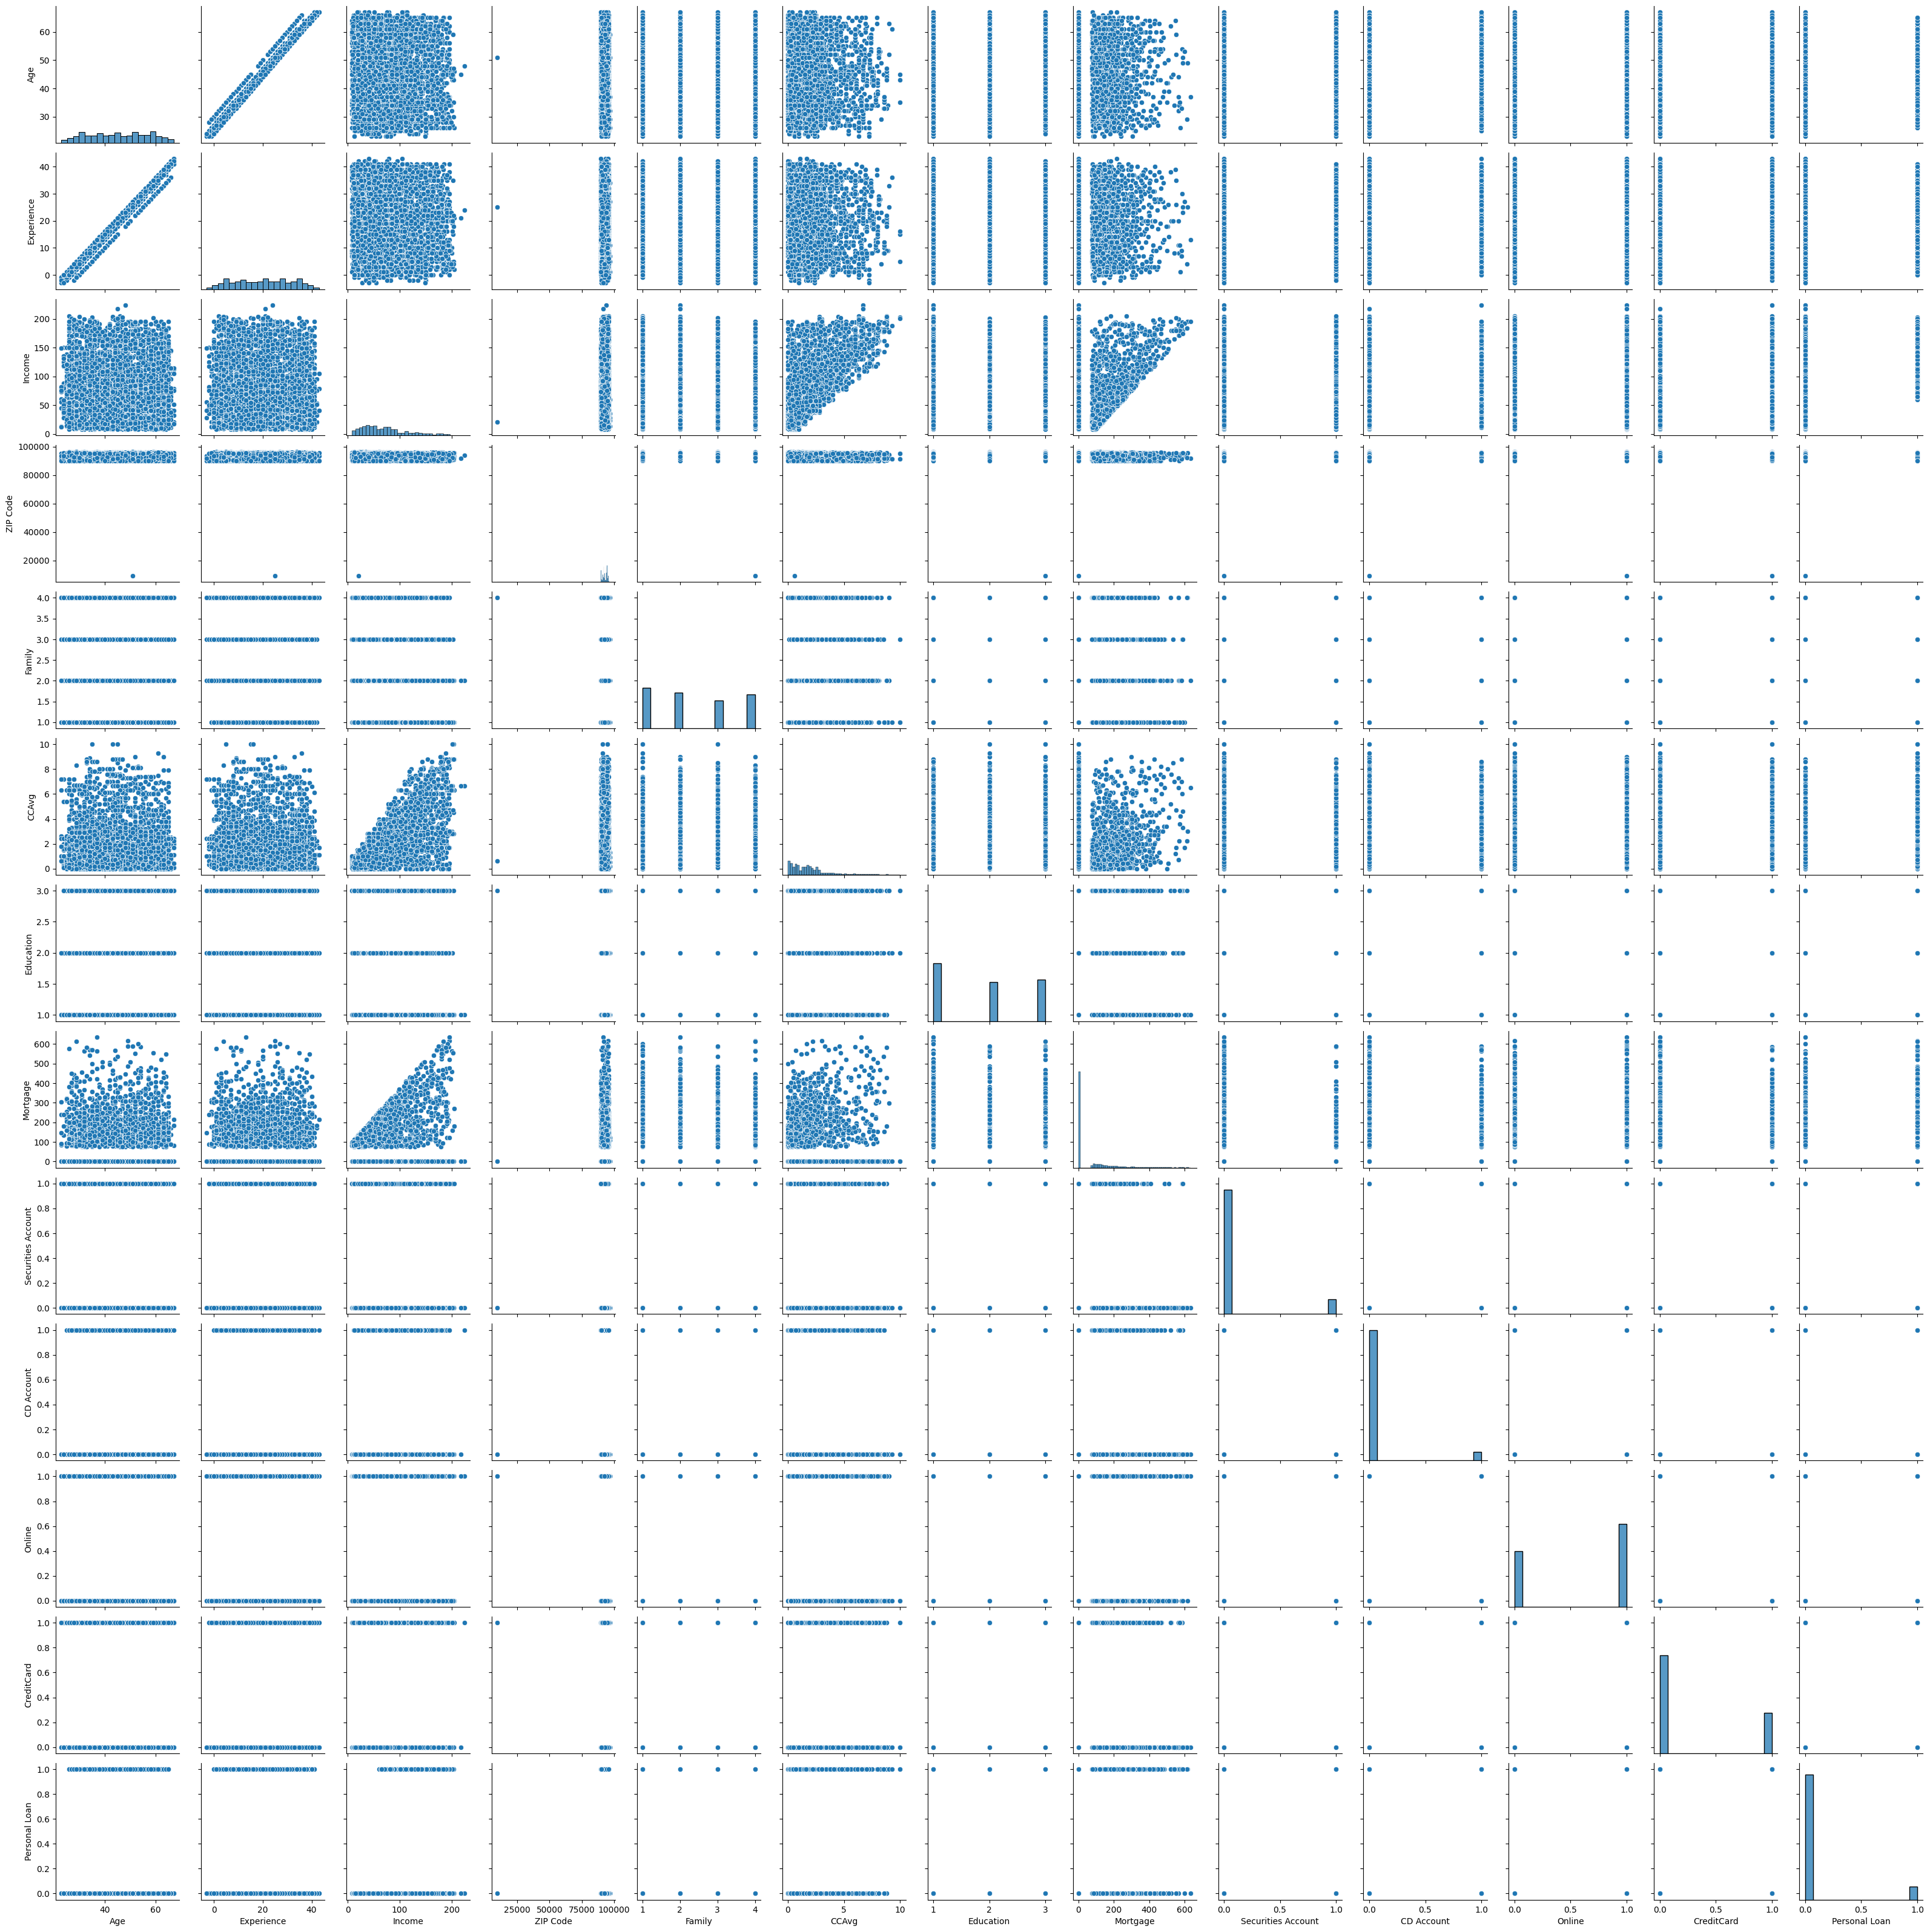

In [33]:
sns.pairplot(df.iloc[:,1:])

1. The 'Age' column is normally distributed. We can observe that the mean and median are almost the same, which is consistent with the findings in the transposed matrix. Most of the customers' ages fall between 25 to 65 years.

2. 'Experience' is also normally distributed, with the mean almost equal to the median. 'Experience' and 'Age' exhibit a strong positive association.

3. 'Income' shows positive skewness and is likely to have outliers.

4. There seems to be no discernible relationship between ZIP Code and other variables.

5. Both 'Family' and 'Education' show low association with 'Personal Loan'.

6. The distribution of 'CCAvg' is positively skewed. The majority of customers have an average monthly spending between 1k to 9k.

7. 'Mortgage' also displays positive skewness, with the majority of individuals having a mortgage of less than 40K.

In summary, the observations suggest strong associations between certain attributes like 'Age' and 'Experience', as well as positive skewness in variables like 'Income', 'CCAvg', and 'Mortgage'. Meanwhile, variables such as 'ZIP Code', 'Family', and 'Education' seem to have weaker associations with the 'Personal Loan' variable.

In [35]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [36]:
df[df['Experience']<0]['Experience'].count()

52

52 records in experience are negative.

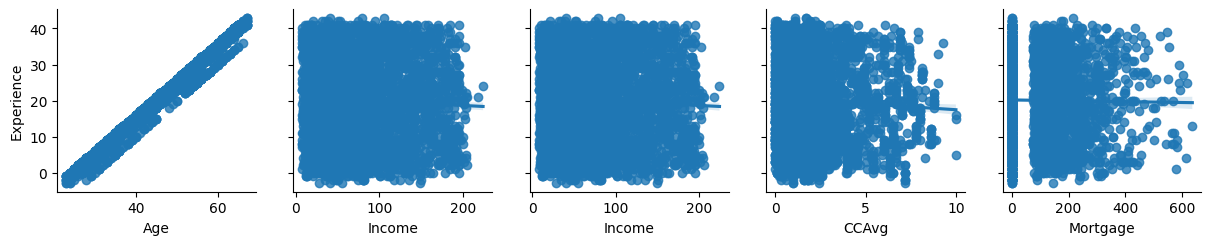

In [38]:
qVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = qVar)
expGrid.map(sns.regplot)

By looking at the above plots, we can see that 'Age' has a very strong and positive association with 'Experience'. I am also considering 'Education' to fix the negative experience error. Because as we know, experience relates to the education level.

We can replace each negative 'Experience' value with the median of positive 'Experience' associated with the particular 'Age' and 'Education' value.

In [39]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

Replaced negative experience with median based on conditions.

In [40]:
df[df['Experience']<0]['Experience'].count()

0

In [41]:
df.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<ipython-input-42-7c40bba650e9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='ID', ylabel='Density'>

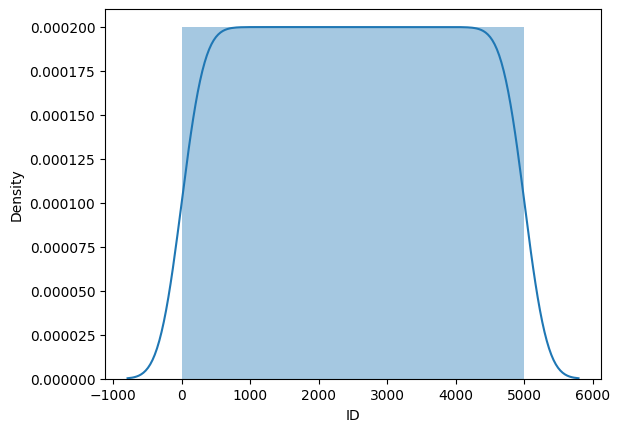

In [42]:
sns.distplot(df['ID'])

<ipython-input-43-0fafe04ea3f6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

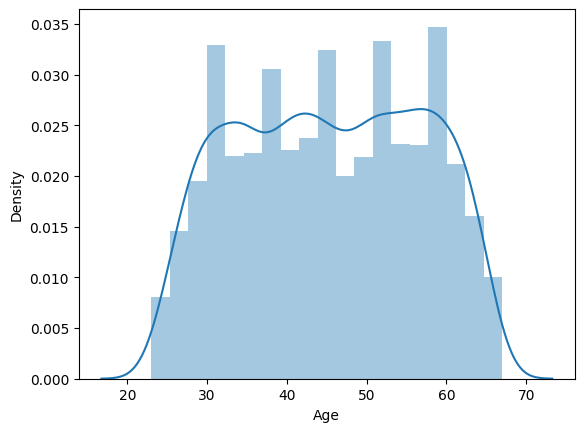

In [43]:
sns.distplot(df['Age'])

<ipython-input-44-c295d2895934>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

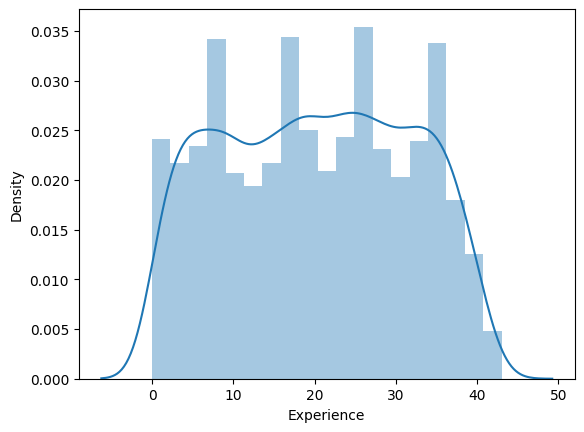

In [44]:
sns.distplot(df['Experience'])

<ipython-input-46-332167f08bea>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

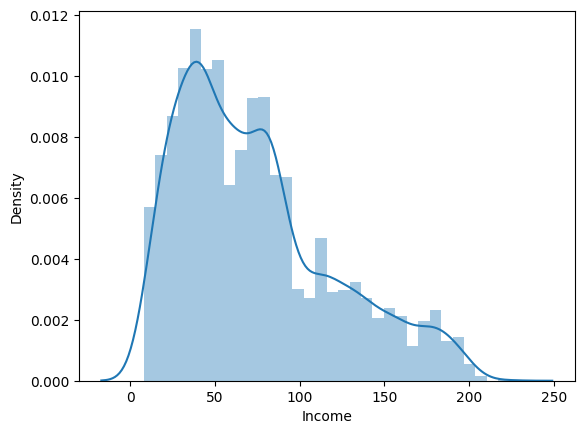

In [46]:
sns.distplot(df['Income'])

Skewed because the tail goes to the right.

<ipython-input-47-99407c05d9be>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='ZIP Code', ylabel='Density'>

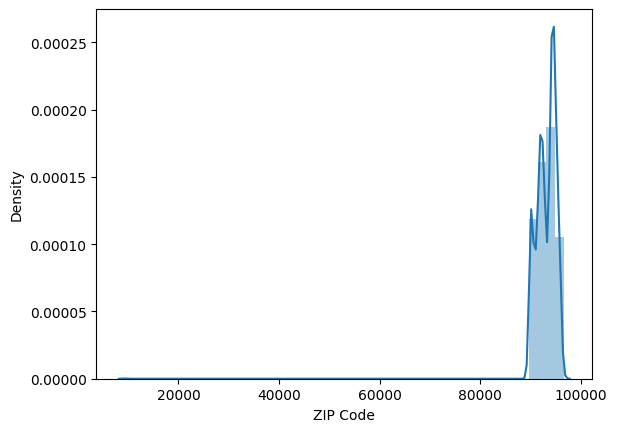

In [47]:
sns.distplot(df['ZIP Code'])

<ipython-input-48-adf2e82b575c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CCAvg', ylabel='Density'>

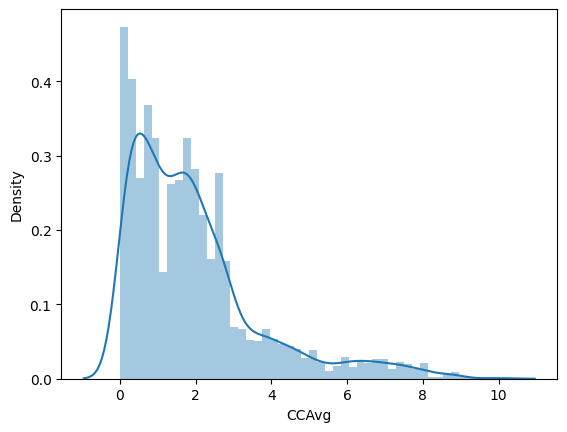

In [48]:
sns.distplot(df['CCAvg'])

The distribution exhibits a skewed shape, with the elongated tail extending towards the right side. The majority of customers have a monthly average credit card spending that falls within the range of 1000 to 2500. However, there is a smaller subset of customers who deviate significantly from this central tendency, displaying monthly expenditures exceeding 8,000. This indicates the presence of a few outliers or high spenders among the customer base, contributing to the right-skewed nature of the distribution.

<ipython-input-49-9021a75539ee>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Education', ylabel='Density'>

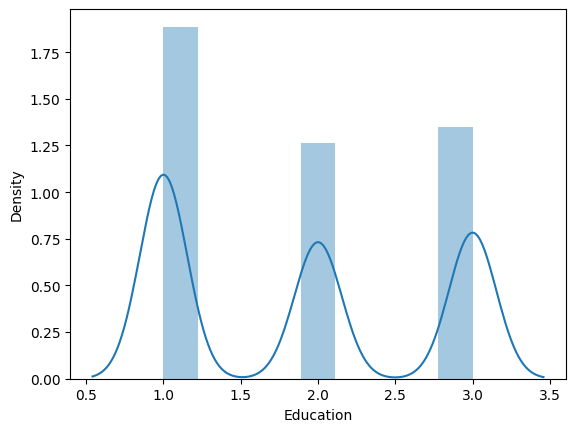

In [49]:
sns.distplot(df['Education'])

<ipython-input-50-b678c3ac20c9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Mortgage', ylabel='Density'>

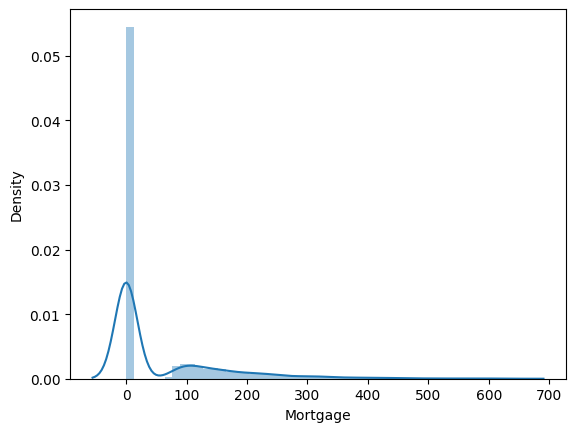

In [50]:
sns.distplot(df['Mortgage'])

The distribution exhibits a right-skewed pattern, characterized by an elongated tail extending towards the higher values on the right side. The majority of customers do not have a mortgage, as indicated by the concentration of data points towards the lower end of the distribution. However, there is a notable cluster of customers whose mortgage amounts range from $80,000 to $150,000. Additionally, a smaller subset of customers deviate significantly from the central tendency, with mortgage amounts exceeding $600,000. These high-value outliers contribute to the skewness observed in the distribution, with the tail stretching towards the higher mortgage amounts.

<ipython-input-51-7781c9bcdaba>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Online', ylabel='Density'>

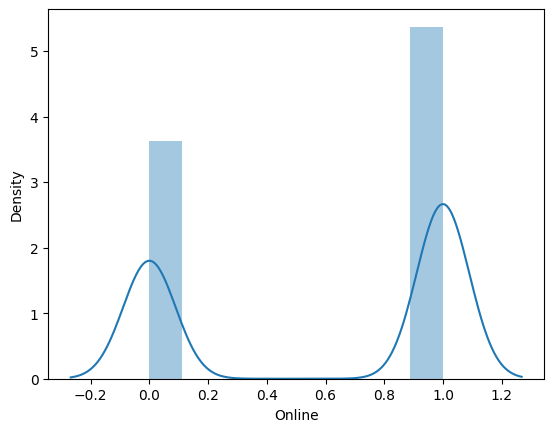

In [51]:
sns.distplot(df['Online'])

<ipython-input-52-341b2de73440>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CreditCard', ylabel='Density'>

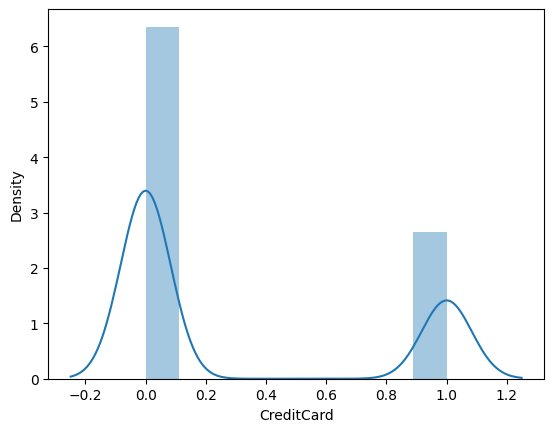

In [52]:
sns.distplot(df['CreditCard'])

In [53]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


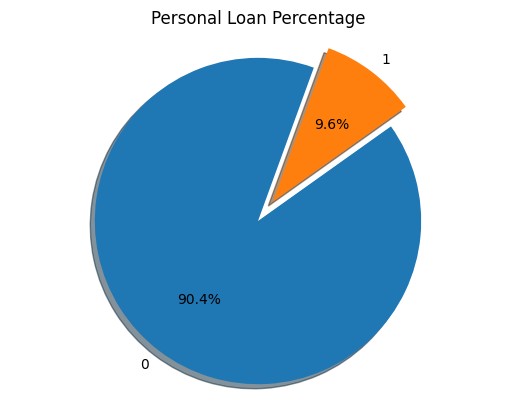

In [54]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

From the plots above, it's clear that the data has a significant bias, with approximately a 1:10 ratio, favoring the category of people who do not accept personal loans. Based on this, we can infer that our model is likely to perform better in predicting which customers will not accept a personal loan. However, our primary goal is to identify the customers who are likely to accept a personal loan, based on the given features. This imbalance in the data could pose a challenge in achieving accurate predictions for the minority class, which is the customers who would accept a personal loan.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

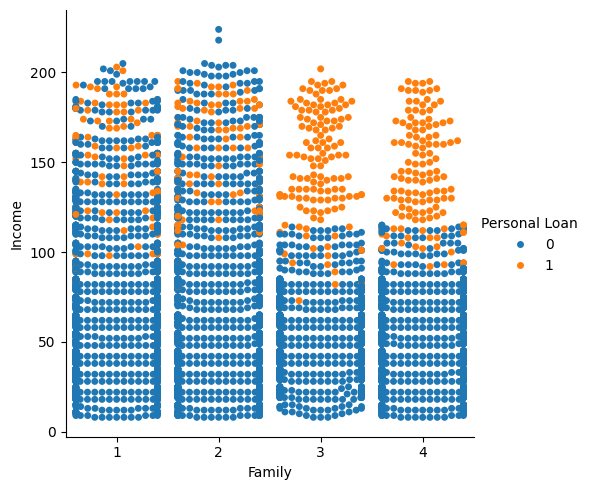

In [55]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

<Axes: xlabel='Education', ylabel='Income'>

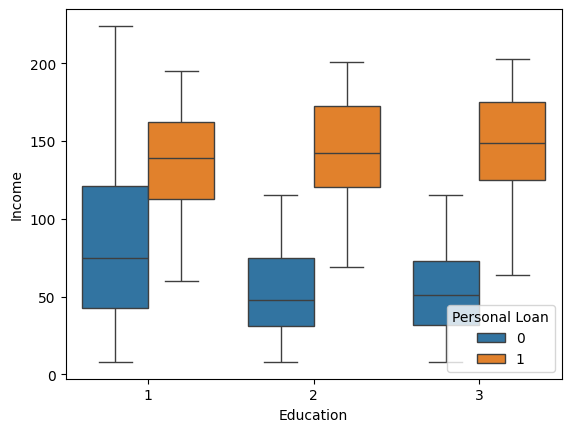

In [56]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

The data suggests that customers with an undergraduate education level and a family size greater than 3 are more likely to take out loans. Additionally, customers who took out loans have a similar income range regardless of their education level. However, those with a graduate or higher education appear to have a higher probability of obtaining a loan.

<Axes: xlabel='Education', ylabel='Mortgage'>

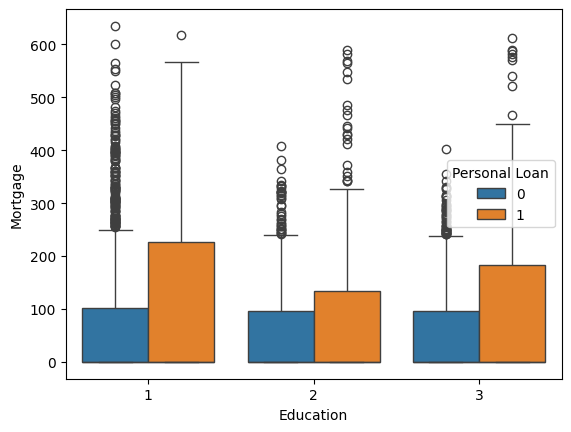

In [57]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

The boxplot indicates that for customers with an education level of 1, those who did not take a loan tend to have higher mortgage amounts compared to those who took a loan. However, for customers with education levels 2 and 3, the trend reverses, where those who did not take a loan have lower mortgage amounts than those who took a loan.

<Axes: xlabel='Securities Account', ylabel='count'>

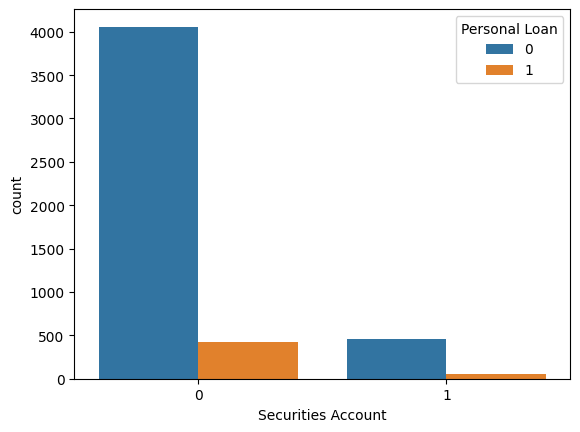

In [59]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

Customers with security accounts are more likely to take a loan.

<Axes: xlabel='Family', ylabel='count'>

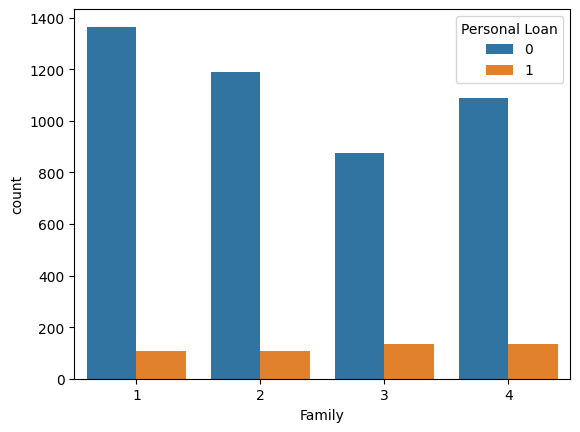

In [60]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

<Axes: xlabel='CD Account', ylabel='count'>

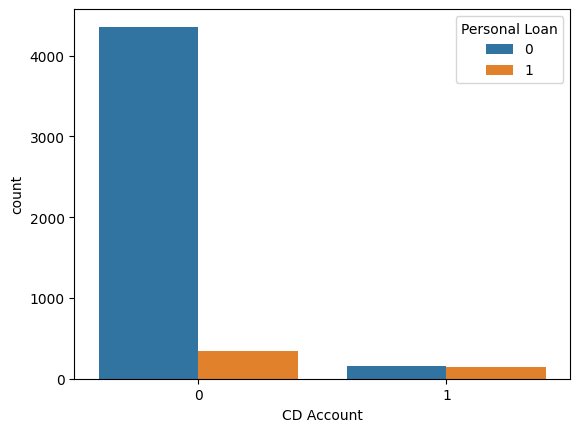

In [61]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

The majority of customers do not have a CD account or a loan. However, nearly all customers with a CD account also have a loan.

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

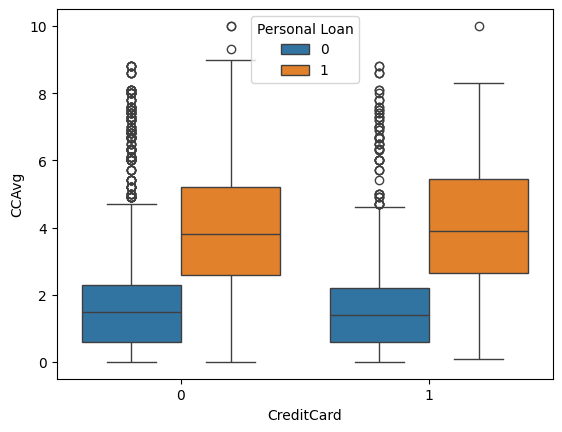

In [62]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

Customers who have credit card and monthly spending is higher are more likly to take loan.

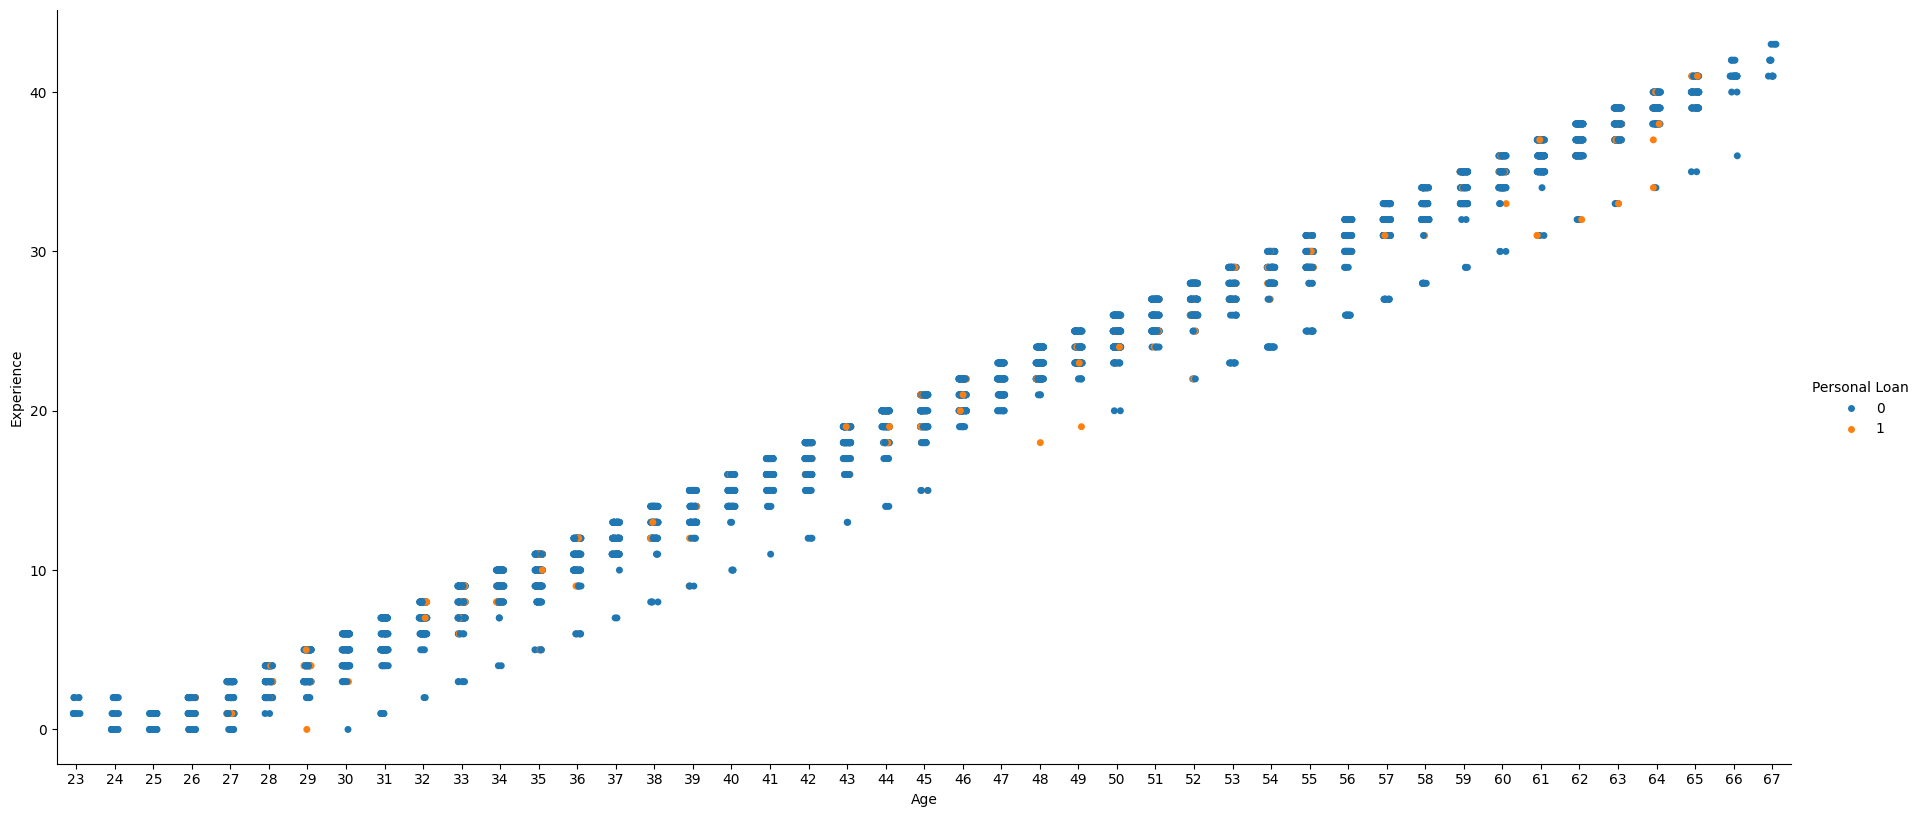

In [64]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

The plots clearly demonstrate a strong positive correlation between Age and Experience. As a customer's age increases, their work experience also tends to increase. Given this high association, we could consider dropping the Experience feature when building our model, as Age may sufficiently capture the information provided by Experience.

<ipython-input-65-5b4bbfdd4fc1>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-65-5b4bbfdd4fc1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'CCAvg Distribution')

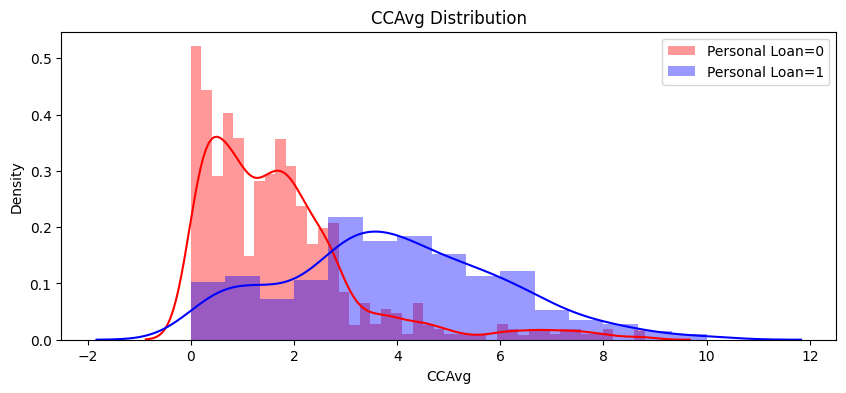

In [65]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

The data indicates that customers who have taken a personal loan tend to have a higher average credit card spending compared to those who did not take a loan. This suggests that a customer's average credit card spending could be a useful predictor in determining their likelihood of obtaining a personal loan.

In [66]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

<ipython-input-67-944c453a84ed>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-67-944c453a84ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Income Distribution')

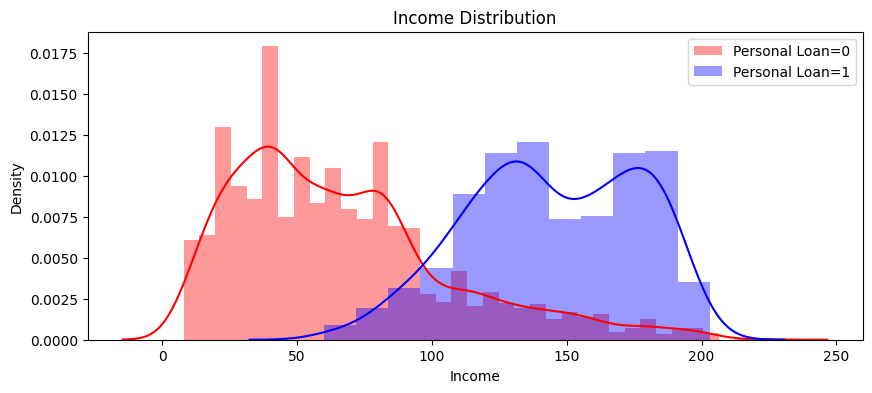

In [67]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

High income seems to be good predictor of whether or not a customer will take a personal loan.

<Axes: >

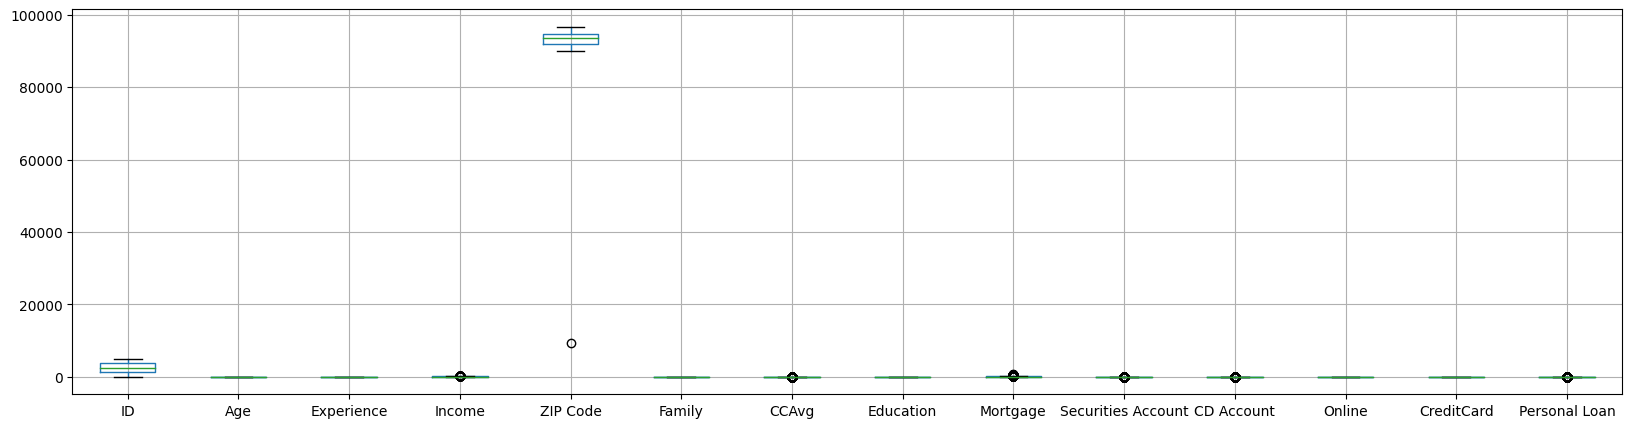

In [68]:
df.boxplot(return_type='axes', figsize=(20,5))

The boxplots reveal the presence of outliers across several columns. The 'Mortgage' column exhibits a substantial number of outliers, while 'Income' and 'CCAvg' (average credit card spending) also display some outlying values. To mitigate the impact of these outliers, we can consider scaling or transforming the attributes during the data preprocessing step.

<Axes: title={'center': 'Correlation of Attributes'}>

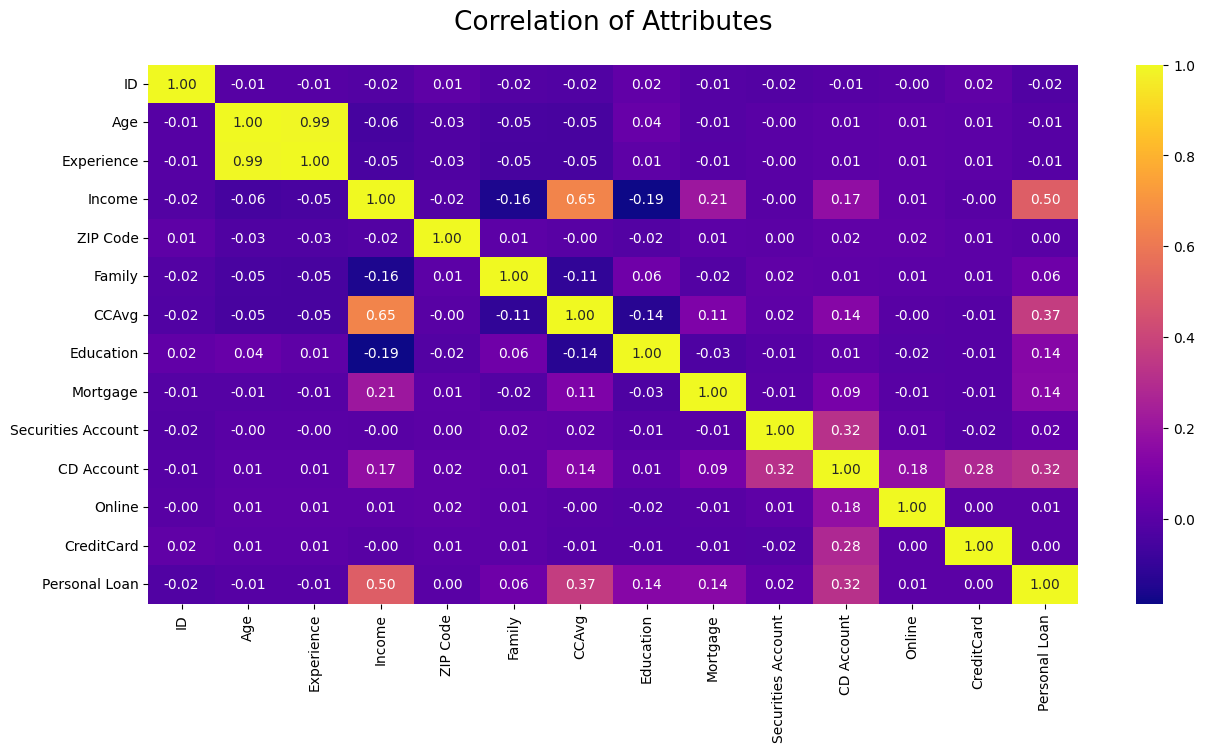

In [69]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

- 'Age' and 'Experience' exhibit an extremely high correlation, close to 1, indicating a strong linear relationship between these two features.

- 'Income' and 'CCAvg' (average credit card spending) show a moderate positive correlation.

- 'Personal Loan' has the highest correlations with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education', suggesting these features may significantly influence whether a customer obtains a personal loan.

- There is an association between 'CD Account' and several other features, including 'Credit Card', 'Securities Account', 'Online', 'CCAvg', and 'Income'.

- 'Mortgage' displays a moderate positive correlation with 'Income', around 0.12.

- 'Income' appears to influence multiple features, such as 'CCAvg', 'Personal Loan', 'CD Account', and 'Mortgage', indicating its potential importance in the dataset.

In [70]:
df = df.drop(['ID', 'ZIP Code'], axis=1)

In [71]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [72]:
loan_with_experience = df
loan_without_experience = df.drop(['Experience'], axis=1)

In [73]:
print('Columns With Experience : ', loan_with_experience.columns)
print('Columns Without Experience : ', loan_without_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


In [74]:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

In [75]:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

In [76]:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


In [78]:
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() 



In [79]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Below is the comparison b/w Logistic Regression Model Accuracy and Confussion Matrix with 'Experience' and W/O 'Experience'.



In [80]:
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])


Logistic Regression Model Accuracy Score W/O Experience  : 0.940000
Logistic Regression Model Accuracy Score With Experience : 0.944000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1339   12]
 [  78   71]]

True Possitive    =  71
True Negative     =  1339
False Possive     =  12
False Negative    =  78

Logistic Regression Confusion Matrix With Experience: 
 [[1334   17]
 [  67   82]]

True Possitive    =  82
True Negative     =  1334
False Possive     =  17
False Negative    =  67


The accuracy results indicate that including the 'Experience' feature yields a slightly higher accuracy of 94.60%, compared to 94.26% without 'Experience'.
An analysis of the confusion matrices reveals that the model's predictions for both customers who do not accept loans and customers who accept loans are more accurate when the 'Experience' feature is included.
The inclusion of 'Experience' leads to a reduction in Type 1 (False Positive) and Type 2 (False Negative) errors.
These findings suggest that scaling the attributes could potentially improve the accuracy further.
Based on the superior performance observed with the 'Experience' feature, we will not consider the version of the dataset without 'Experience' for further iterations.

In [81]:
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [82]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [96]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scaling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scaling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of Logistic Regression----------------------------

After Scaling Logistic Regression Model Accuracy Score with Experience: 0.947333

After Scaling Logistic Regression Confusion Matrix With Experience: 
 [[1333   18]
 [  61   88]]

True Possitive    =  88
True Negative     =  1333
False Possive     =  18
False Negative    =  61

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.59
F1 score of accepting Loan  :  0.69


Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification error :
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

The optimal number of neighbor is k= 3


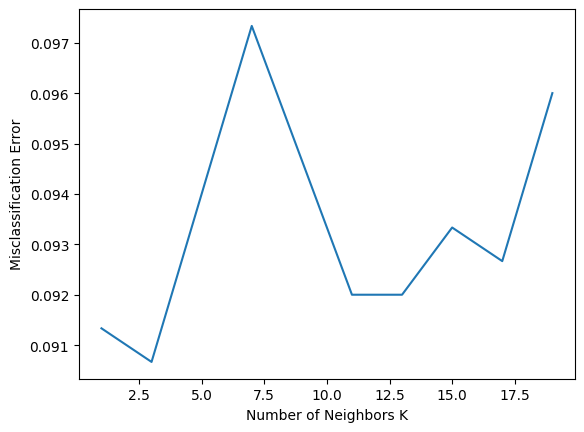

In [84]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [86]:
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [87]:
# Comparison
print('K-NN Model Accuracy Score W/O Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Possitive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Possive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])


K-NN Model Accuracy Score W/O Experience  : 0.909333
K-NN Model Accuracy Score With Experience : 0.904000

K-NN Confusion Matrix W/O Experience: 
 [[1304   47]
 [  89   60]]

True Possitive    =  60
True Negative     =  1304
False Possive     =  47
False Negative    =  89

K-NN Confusion Matrix With Experience: 
 [[1301   50]
 [  94   55]]

True Possitive    =  55
True Negative     =  1301
False Possive     =  50
False Negative    =  94


The accuracy results show that excluding the 'Experience' feature yields a higher accuracy of 90.93%, compared to 90.20% when including 'Experience'.
An analysis of the confusion matrices reveals that the model's predictions for both customers who do not accept loans and customers who accept loans are more accurate when the 'Experience' feature is excluded.
Excluding the 'Experience' feature leads to lower Type 1 (False Positive) and Type 2 (False Negative) errors.
These findings suggest that scaling the attributes could potentially improve the accuracy further.
Based on the superior performance observed without the 'Experience' feature, we will not consider the version of the dataset with 'Experience' for further iterations.

In [88]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [89]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [97]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scaling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scaling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scaling K-NN Model Accuracy Score without Experience: 0.958667

After Scaling K-NN Confusion Matrix Without Experience: 
 [[1341   10]
 [  52   97]]

True Possitive    =  97
True Negative     =  1341
False Possive     =  10
False Negative    =  52

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.91
recall of accepting Loan    :  0.65
F1 score of accepting Loan  :  0.76


In [91]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [92]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [93]:
# Comparison
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Possitive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Possive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])



Naïve Bayes Model Accuracy Score W/O Experience  : 0.874667
Naïve Bayes Model Accuracy Score With Experience : 0.874667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1227  124]
 [  64   85]]

True Possitive    =  85
True Negative     =  1227
False Possive     =  124
False Negative    =  64

Naïve Bayes Confusion Matrix With Experience: 
 [[1228  123]
 [  65   84]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  123
False Negative    =  65


The accuracy results are almost identical with and without the 'Experience' feature.
An analysis of the confusion matrices reveals that the model's predictions for customers who do not accept loans and customers who accept loans are comparable, regardless of whether the 'Experience' feature is included or excluded.
Both versions of the model (with and without 'Experience') exhibit similar Type I (False Positive) and Type II (False Negative) error rates.
These findings suggest that scaling the attributes could potentially improve the accuracy further.
Since the performance is nearly equivalent with and without the 'Experience' feature, either version of the dataset (with or without 'Experience') can be considered for further iterations.

In [94]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [98]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scaling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scaling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scaling Naïve Bayes Model Accuracy Score: 0.872000

After Scaling Naïve Bayes Confusion Matrix: 
 [[1224  127]
 [  65   84]]

True Possitive    =  84
True Negative     =  1224
False Possive     =  127
False Negative    =  65

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Accuracy of accepting Loan   :  0.86
precision of accepting Loan  :  0.4
recall of accepting Loan     :  0.56
F1 score of accepting Loan   :  0.47


Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1333   18]
 [  61   88]]

     True Possitive    =  88
     True Negative     =  1333
     False Possive     =  18
     False Negative    =  61

K-Nearest Neighbors: 
 [[1341   10]
 [  52   97]]

    True Possitive    =  97
    True Negative     =  1341
    False Possive     =  10
    False Negative    =  52

Naive Bayes: 
 [[1224  127]
 [  65   84]]

    True Possitive    =  84
    True Negative     =  1224
    False Possive     =  127
    False Negative    =  65


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


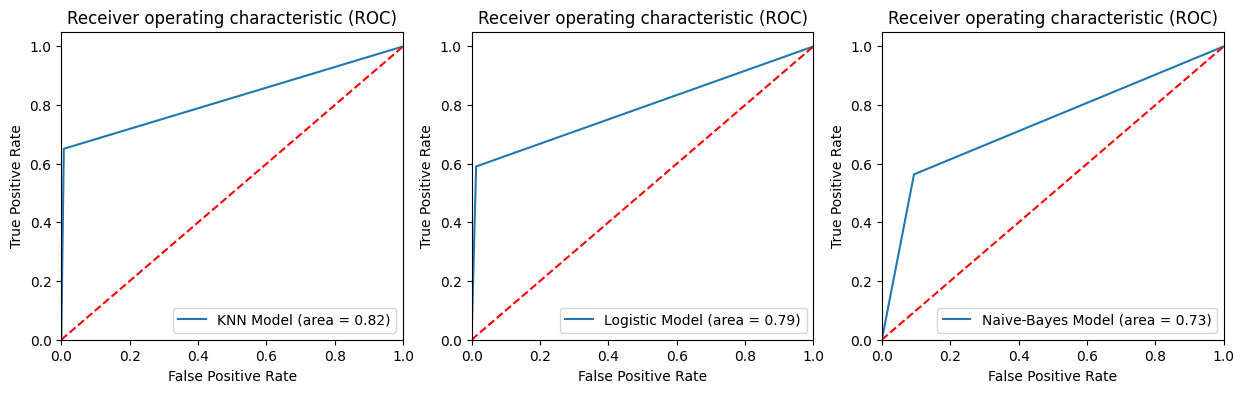

In [99]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The results demonstrate that the k-Nearest Neighbors (KNN) algorithm applied to the scaled data achieves the highest accuracy of 96% among the models evaluated.
The KNN model also exhibits the lowest Type I (False Positive) and Type II (False Negative) error rates.
The area under the ROC curve for the KNN model is 0.82, which is closer to the ideal value of 1 compared to the Logistic Regression model (0.79) and the Naive Bayes model (0.73), indicating superior performance.
Based on the higher accuracy, lower error rates, and larger area under the ROC curve, the k-Nearest Neighbors algorithm emerges as the most suitable choice among the three algorithms applied to this dataset for predicting which customers are likely to accept a personal loan.